In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [3]:
df = pd.read_csv("chicago_crimes_2001_present.csv")
df["date"] = pd.to_datetime(df["date"])


In [11]:
print(df.columns)
display(df.head())
print(df.dtypes)

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,8330429,HT564067,2011-10-28 05:05:00+00:00,001XX N JEFFERSON ST,0313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,PARKING LOT/GARAGE(NON.RESID.),True,False,...,42.0,28.0,03,1172295.0,1901507.0,2011,2016-02-04 06:33:39.000000 UTC,41.885182,-87.642757,"(41.885182294, -87.642757034)"
1,4382503,HL677533,2005-10-16 11:57:14+00:00,001XX N JEFFERSON ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,42.0,28.0,03,1172313.0,1900889.0,2005,2018-02-28 03:56:25.000000 UTC,41.883486,-87.642709,"(41.883486065, -87.642709199)"
2,10382226,HZ118472,2016-01-17 01:17:00+00:00,0000X E LAKE ST,031A,ROBBERY,ARMED: HANDGUN,RESTAURANT,False,False,...,42.0,32.0,03,1176575.0,1901750.0,2016,2018-02-10 03:50:01.000000 UTC,41.885754,-87.627033,"(41.885753511, -87.627032961)"
3,10418666,HZ155446,2016-02-18 04:40:00+00:00,001XX N MICHIGAN AVE,031A,ROBBERY,ARMED: HANDGUN,CONVENIENCE STORE,True,False,...,42.0,32.0,03,1177271.0,1901522.0,2016,2018-02-10 03:50:01.000000 UTC,41.885112,-87.624484,"(41.885112119, -87.624484053)"
4,2375767,HH681975,2002-09-30 10:10:00+00:00,005XX W MADISON ST,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,...,42.0,28.0,03,1173039.0,1900311.0,2002,2018-02-28 03:56:25.000000 UTC,41.881884,-87.640060,"(41.881883933, -87.640060441)"


unique_key                            int64
case_number                          object
date                    datetime64[ns, UTC]
block                                object
iucr                                 object
primary_type                         object
description                          object
location_description                 object
arrest                                 bool
domestic                               bool
beat                                  int64
district                              int64
ward                                float64
community_area                      float64
fbi_code                             object
x_coordinate                        float64
y_coordinate                        float64
year                                  int64
updated_on                           object
latitude                            float64
longitude                           float64
location                             object
dtype: object


In [5]:
print(df.describe())

         unique_key         beat  district        ward  community_area  \
count  1.000000e+03  1000.000000    1000.0  946.000000      946.000000   
mean   8.780968e+06   111.357000       1.0   34.487315       31.247357   
std    3.423316e+06     0.479355       0.0   15.433021        1.564189   
min    1.314247e+06   111.000000       1.0    2.000000       28.000000   
25%    6.417170e+06   111.000000       1.0   42.000000       32.000000   
50%    9.940976e+06   111.000000       1.0   42.000000       32.000000   
75%    1.142165e+07   112.000000       1.0   42.000000       32.000000   
max    1.329233e+07   112.000000       1.0   42.000000       32.000000   

       x_coordinate  y_coordinate         year    latitude   longitude  
count  9.910000e+02  9.910000e+02  1000.000000  991.000000  991.000000  
mean   1.175440e+06  1.900545e+06  2013.173000   41.882471  -87.631239  
std    1.560702e+03  9.189916e+02     6.369273    0.002504    0.005745  
min    1.171676e+06  1.898426e+06  2001.0

Text(0, 0.5, 'Total Crimes')

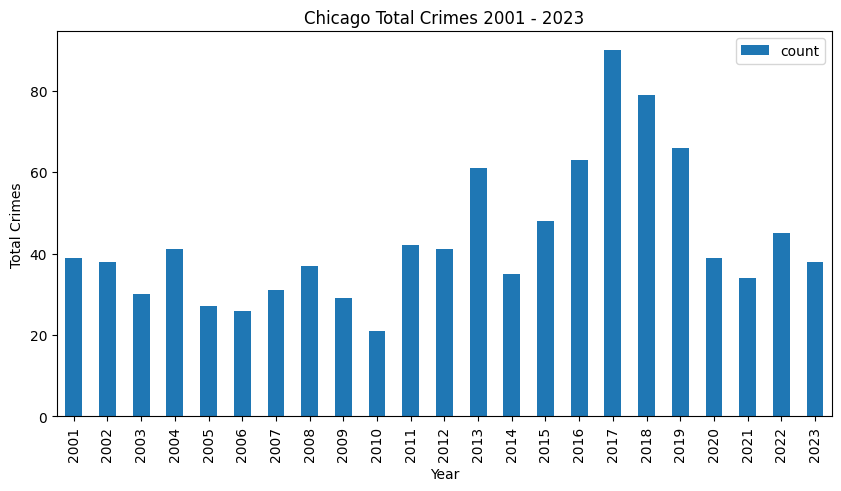

In [6]:
total_crimes_by_year = pd.DataFrame(df["year"].value_counts().reset_index())
total_crimes_by_year.columns = ["year", "count"]
total_crimes_by_year = total_crimes_by_year.sort_values(by="year")

# print(total_crimes_by_year)

total_crimes_by_year.plot.bar( x = "year", y = "count", figsize=(10,5))

plt.title("Chicago Total Crimes 2001 - 2023")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

In [7]:
type_of_crimes = pd.DataFrame(set(zip(df["primary_type"].unique(), df["primary_type"].value_counts())), columns = ["primary_type", "count"])
print(type_of_crimes)

top_five_crimes = type_of_crimes.sort_values(by = "count", ascending = False).head(5)
print(top_five_crimes)

                  primary_type  count
0                      ROBBERY    625
1              CRIMINAL DAMAGE     24
2                      ASSAULT     71
3           DECEPTIVE PRACTICE     29
4                    NARCOTICS      1
5                      BATTERY     95
6            CRIMINAL TRESPASS     17
7   OFFENSE INVOLVING CHILDREN      3
8       PUBLIC PEACE VIOLATION      1
9         LIQUOR LAW VIOLATION      1
10               OTHER OFFENSE      1
11           WEAPONS VIOLATION     12
12                PROSTITUTION      8
13         CRIM SEXUAL ASSAULT      1
14                       THEFT     34
15                    BURGLARY     38
16         MOTOR VEHICLE THEFT     34
17                 SEX OFFENSE      4
18     CRIMINAL SEXUAL ASSAULT      1
   primary_type  count
0       ROBBERY    625
5       BATTERY     95
2       ASSAULT     71
15     BURGLARY     38
14        THEFT     34


Text(0.5, 1.0, 'Chicago Top Five Crimes 2001 - 2023')

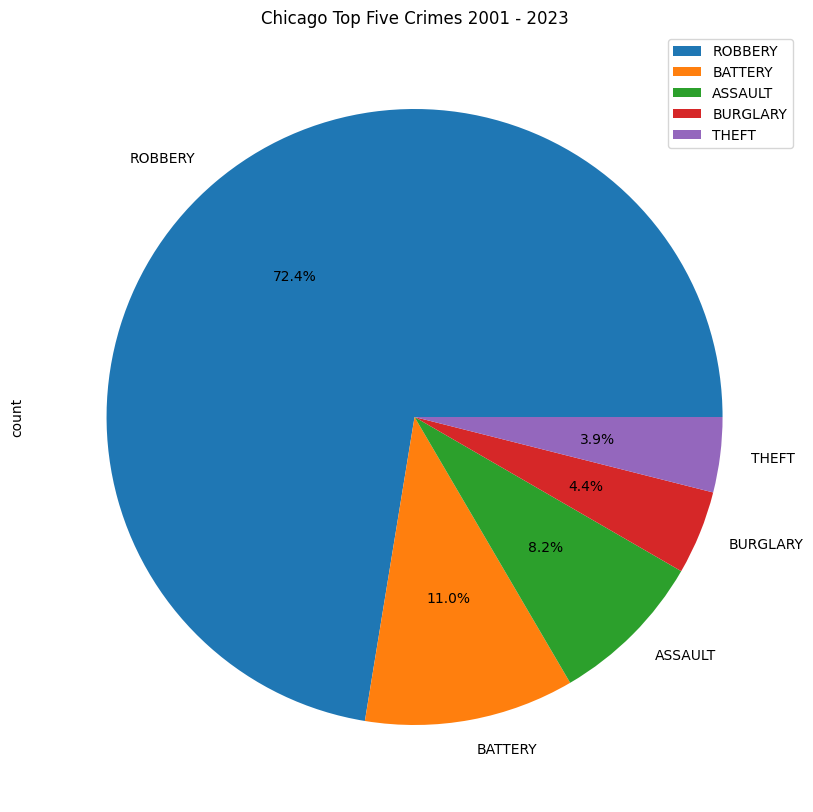

In [8]:
# top_five_crimes.plot.pie(y = "count", labels = top_five_crimes["primary_type"], figsize = (12,10))

top_five_crimes.plot.pie(y="count", labels=top_five_crimes['primary_type'], autopct='%1.1f%%', figsize=(12, 10))

plt.title("Chicago Top Five Crimes 2001 - 2023")


In [9]:
crimes_2021 = df[df["date"].dt.year == 2021]
crimes_2021_count =  pd.DataFrame(set(zip(crimes_2021["primary_type"].unique(), crimes_2021["primary_type"].value_counts())), columns = ["primary_type", "count"])
print(crimes_2021_count)

crimes_2022 = df[df["date"].dt.year == 2022]
crimes_2022_count =  pd.DataFrame(set(zip(crimes_2022["primary_type"].unique(), crimes_2022["primary_type"].value_counts())), columns = ["primary_type", "count"])
print(crimes_2022_count)

crimes_2023 = df[df["date"].dt.year == 2023]
crimes_2023_count =  pd.DataFrame(set(zip(crimes_2023["primary_type"].unique(), crimes_2023["primary_type"].value_counts())), columns = ["primary_type", "count"])
print(crimes_2023_count)

             primary_type  count
0                 ROBBERY      1
1  PUBLIC PEACE VIOLATION      1
2                   THEFT      8
3                 ASSAULT      1
4                 BATTERY     19
5         CRIMINAL DAMAGE      1
6      DECEPTIVE PRACTICE      3
         primary_type  count
0       OTHER OFFENSE      1
1               THEFT      2
2             BATTERY      8
3             ROBBERY     23
4   CRIMINAL TRESPASS      1
5            BURGLARY      1
6  DECEPTIVE PRACTICE      1
7             ASSAULT      7
8     CRIMINAL DAMAGE      1
          primary_type  count
0            NARCOTICS      1
1        OTHER OFFENSE      1
2              ROBBERY      1
3                THEFT      2
4  MOTOR VEHICLE THEFT      1
5              ASSAULT     27
6   DECEPTIVE PRACTICE      1
7             BURGLARY      3
8      CRIMINAL DAMAGE      1


In [10]:
crimes_year_2000_and_up = df[df["date"].dt.year >= 2021]
# display(crimes_year_2000_and_up)

total_crimes__year_2000_and_up = crimes_year_2000_and_up.groupby(df["date"].dt.year)["primary_type"].value_counts()
display(total_crimes__year_2000_and_up)

date  primary_type          
2021  THEFT                     19
      BATTERY                    8
      ASSAULT                    3
      ROBBERY                    1
      CRIMINAL DAMAGE            1
      DECEPTIVE PRACTICE         1
      PUBLIC PEACE VIOLATION     1
2022  THEFT                     23
      BATTERY                    8
      ASSAULT                    7
      ROBBERY                    2
      BURGLARY                   1
      OTHER OFFENSE              1
      CRIMINAL TRESPASS          1
      CRIMINAL DAMAGE            1
      DECEPTIVE PRACTICE         1
2023  THEFT                     27
      DECEPTIVE PRACTICE         3
      CRIMINAL DAMAGE            2
      BURGLARY                   1
      ROBBERY                    1
      OTHER OFFENSE              1
      NARCOTICS                  1
      MOTOR VEHICLE THEFT        1
      ASSAULT                    1
Name: count, dtype: int64